In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths to dataset
train_dir = r"C:\Users\shrid\Desktop\College\3rd Year\WIN SEM\Deep Larning\dataset\train"
test_dir = r"C:\Users\shrid\Desktop\College\3rd Year\WIN SEM\Deep Larning\dataset\test"

# Data augmentation & normalization
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for testing

# Load images in batches
train_data = train_datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')

# Print class labels
print("Class Labels:", train_data.class_indices)


Found 3322 images belonging to 4 classes.
Found 660 images belonging to 4 classes.
Class Labels: {'cyclone': 0, 'earthquake': 1, 'flood': 2, 'wildfire': 3}


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevents overfitting
    Dense(4, activation='softmax')  # 4 output classes (Cyclone, Earthquake, Flood, Wildfire)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
history = model.fit(train_data, validation_data=test_data, epochs=10)


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.4284 - loss: 1.2320 - val_accuracy: 0.7333 - val_loss: 0.7009
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.7560 - loss: 0.7115 - val_accuracy: 0.7773 - val_loss: 0.5863
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.7911 - loss: 0.5787 - val_accuracy: 0.8106 - val_loss: 0.5207
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.7922 - loss: 0.5733 - val_accuracy: 0.7364 - val_loss: 0.6933
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8361 - loss: 0.4801 - val_accuracy: 0.7970 - val_loss: 0.5236
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8485 - loss: 0.4317 - val_accuracy: 0.7288 - val_loss: 0.6624
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8352 - loss: 0.4643 - val_accuracy: 0.7394 - val_loss: 0.7328
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.8480 - loss: 0.4266 - val_accu

In [24]:
model.save("BASIC_CNN_DISASTER.h5")
model.save("BASIC_CNN_DISASTER.keras")

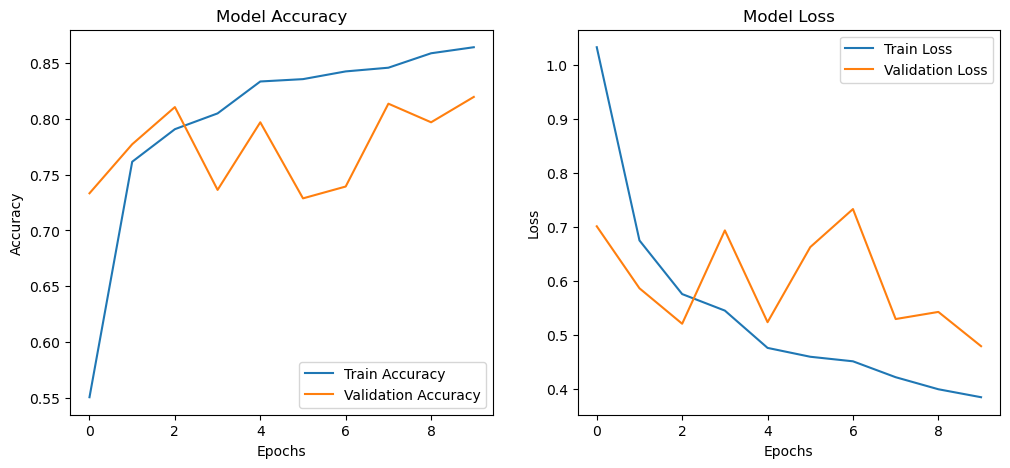

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Plot Training Loss & Accuracy
def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot
    ax[0].plot(history.history['accuracy'], label='Train Accuracy')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    # Loss plot
    ax[1].plot(history.history['loss'], label='Train Loss')
    ax[1].plot(history.history['val_loss'], label='Validation Loss')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.show()
plot_training_history(history)



Found 660 images belonging to 4 classes.


C:\Users\shrid\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step


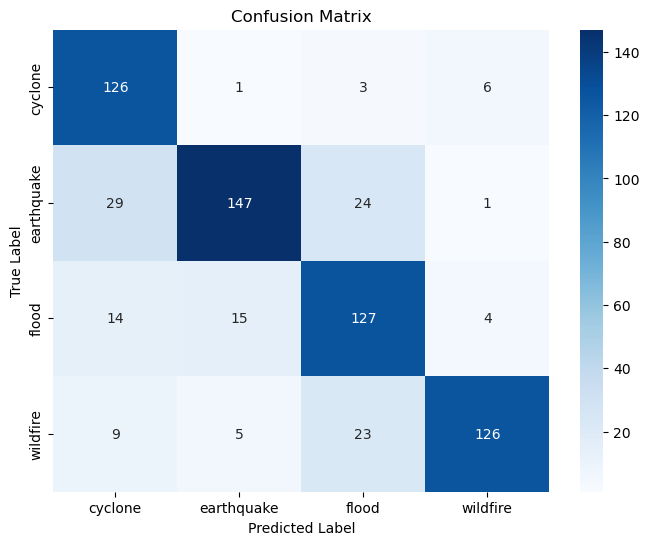

Classification Report:
              precision    recall  f1-score   support

     cyclone       0.71      0.93      0.80       136
  earthquake       0.88      0.73      0.80       201
       flood       0.72      0.79      0.75       160
    wildfire       0.92      0.77      0.84       163

    accuracy                           0.80       660
   macro avg       0.81      0.81      0.80       660
weighted avg       0.81      0.80      0.80       660



In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Load the trained model
model = load_model("BASIC_CNN_DISASTER.keras")

# Define the test data directory
test_dir = "dataset/test"  # Change this path accordingly

# Define image size (must match training image size)
img_size = (128, 128)

# Create ImageDataGenerator for test data (NO Augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,  # You can change this
    class_mode="categorical",
    shuffle=False  # Don't shuffle to match predictions correctly
)

# Get true labels and class indices
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Get class names

# Predict on test data
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)  # Convert probabilities to class labels

# Compute Confusion Matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_labels))


Cyclone
Image 1 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image 1: Predicted as 'Cyclone' with confidence 1.00
Image 2 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image 2: Predicted as 'Cyclone' with confidence 0.59
Image 3 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image 3: Predicted as 'Cyclone' with confidence 0.99
Image 4 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 4: Predicted as 'Flood' with confidence 0.59


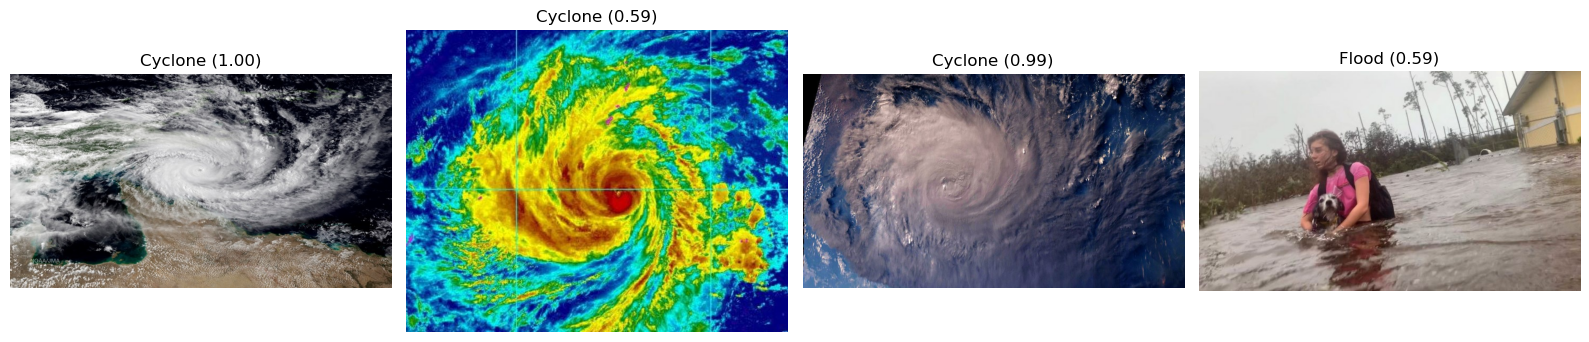

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


print("Cyclone")

# List of image paths
image_paths = [
    "dataset/test/cyclone/929.jpg",
    "dataset/test/cyclone/837.jpg",
    "dataset/test/cyclone/848.jpg",
    "dataset/test/cyclone/874.jpg"
]

# Class labels (manual mapping if `train_data.class_indices` is unavailable)
class_labels = {0: "Cyclone", 1: "Earthquake", 2: "Flood", 3: "Wildfire"}

# Create subplots for 4 images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)

    if img is None:
        print(f"Error: Image not found at {img_path}")
        continue

    # Preprocess Image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img, (128, 128))   # Resize
    img_normalized = img_resized / 255.0        # Normalize

    # Add batch dimension & ensure dtype is float32
    img_input = np.expand_dims(img_normalized, axis=0).astype(np.float32)

    # ✅ Print shape for debugging
    print(f"Image {i+1} input shape: {img_input.shape}")  # Should be (1, 128, 128, 3)

    # 🛠 Debug: Check if shape is correct
    if img_input.shape != (1, 128, 128, 3):
        print(f"Error: Expected shape (1, 128, 128, 3), but got {img_input.shape}")
        continue

    # Predict
    try:
        pred = model.predict(img_input)
        pred_class = np.argmax(pred)  # Get class index
        pred_confidence = np.max(pred)  # Get confidence score
        predicted_label = class_labels.get(pred_class, "Unknown")  # Get class name

        # Display Image with Prediction
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(f"{predicted_label} ({pred_confidence:.2f})")

        # Print Prediction
        print(f"Image {i+1}: Predicted as '{predicted_label}' with confidence {pred_confidence:.2f}")

    except Exception as e:
        print(f"Error during prediction for {img_path}: {e}")

plt.tight_layout()
plt.show()


Earthquake
Image 1 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image 1: Predicted as 'Earthquake' with confidence 0.95
Image 2 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image 2: Predicted as 'Earthquake' with confidence 0.99
Image 3 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Image 3: Predicted as 'Earthquake' with confidence 0.95
Image 4 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image 4: Predicted as 'Earthquake' with confidence 0.53


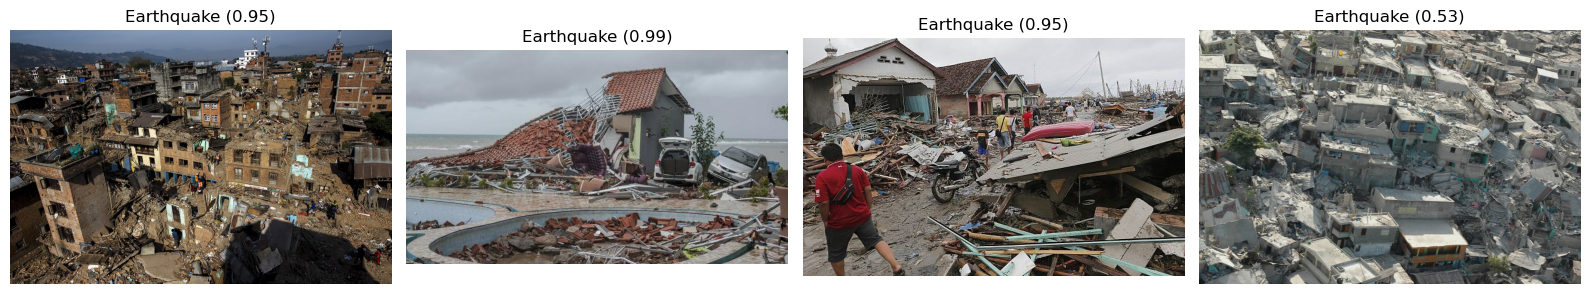

In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


print("Earthquake")

# List of image paths
image_paths = [
    "dataset/test/earthquake/1161.jpg",
    "dataset/test/earthquake/1316.jpg",
    "dataset/test/earthquake/131.jpg",
    "dataset/test/earthquake/1162.jpg"
]

# Class labels (manual mapping if `train_data.class_indices` is unavailable)
class_labels = {0: "Cyclone", 1: "Earthquake", 2: "Flood", 3: "Wildfire"}

# Create subplots for 4 images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)

    if img is None:
        print(f"Error: Image not found at {img_path}")
        continue

    # Preprocess Image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img, (128, 128))   # Resize
    img_normalized = img_resized / 255.0        # Normalize

    # Add batch dimension & ensure dtype is float32
    img_input = np.expand_dims(img_normalized, axis=0).astype(np.float32)

    # ✅ Print shape for debugging
    print(f"Image {i+1} input shape: {img_input.shape}")  # Should be (1, 128, 128, 3)

    # 🛠 Debug: Check if shape is correct
    if img_input.shape != (1, 128, 128, 3):
        print(f"Error: Expected shape (1, 128, 128, 3), but got {img_input.shape}")
        continue

    # Predict
    try:
        pred = model.predict(img_input)
        pred_class = np.argmax(pred)  # Get class index
        pred_confidence = np.max(pred)  # Get confidence score
        predicted_label = class_labels.get(pred_class, "Unknown")  # Get class name

        # Display Image with Prediction
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(f"{predicted_label} ({pred_confidence:.2f})")

        # Print Prediction
        print(f"Image {i+1}: Predicted as '{predicted_label}' with confidence {pred_confidence:.2f}")

    except Exception as e:
        print(f"Error during prediction for {img_path}: {e}")

plt.tight_layout()
plt.show()


Flood
Image 1 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image 1: Predicted as 'Flood' with confidence 0.92
Image 2 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Image 2: Predicted as 'Flood' with confidence 0.53
Image 3 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Image 3: Predicted as 'Flood' with confidence 1.00
Image 4 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Image 4: Predicted as 'Flood' with confidence 0.94


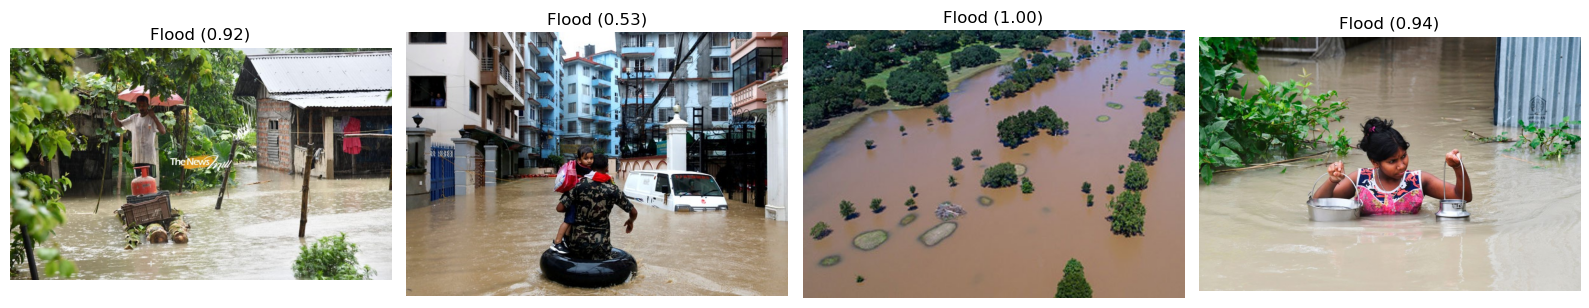

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


print("Flood")

# List of image paths
image_paths = [
    "dataset/test/flood/930.jpg",
    "dataset/test/flood/920.jpg",
    "dataset/test/flood/935.jpg",
    "dataset/test/flood/925.jpg"
]

# Class labels (manual mapping if `train_data.class_indices` is unavailable)
class_labels = {0: "Cyclone", 1: "Earthquake", 2: "Flood", 3: "Wildfire"}

# Create subplots for 4 images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)

    if img is None:
        print(f"Error: Image not found at {img_path}")
        continue

    # Preprocess Image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img, (128, 128))   # Resize
    img_normalized = img_resized / 255.0        # Normalize

    # Add batch dimension & ensure dtype is float32
    img_input = np.expand_dims(img_normalized, axis=0).astype(np.float32)

    # ✅ Print shape for debugging
    print(f"Image {i+1} input shape: {img_input.shape}")  # Should be (1, 128, 128, 3)

    # 🛠 Debug: Check if shape is correct
    if img_input.shape != (1, 128, 128, 3):
        print(f"Error: Expected shape (1, 128, 128, 3), but got {img_input.shape}")
        continue

    # Predict
    try:
        pred = model.predict(img_input)
        pred_class = np.argmax(pred)  # Get class index
        pred_confidence = np.max(pred)  # Get confidence score
        predicted_label = class_labels.get(pred_class, "Unknown")  # Get class name

        # Display Image with Prediction
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(f"{predicted_label} ({pred_confidence:.2f})")

        # Print Prediction
        print(f"Image {i+1}: Predicted as '{predicted_label}' with confidence {pred_confidence:.2f}")

    except Exception as e:
        print(f"Error during prediction for {img_path}: {e}")

plt.tight_layout()
plt.show()


Wildfire
Image 1 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Image 1: Predicted as 'Wildfire' with confidence 1.00
Image 2 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Image 2: Predicted as 'Wildfire' with confidence 1.00
Image 3 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Image 3: Predicted as 'Wildfire' with confidence 0.99
Image 4 input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image 4: Predicted as 'Wildfire' with confidence 1.00


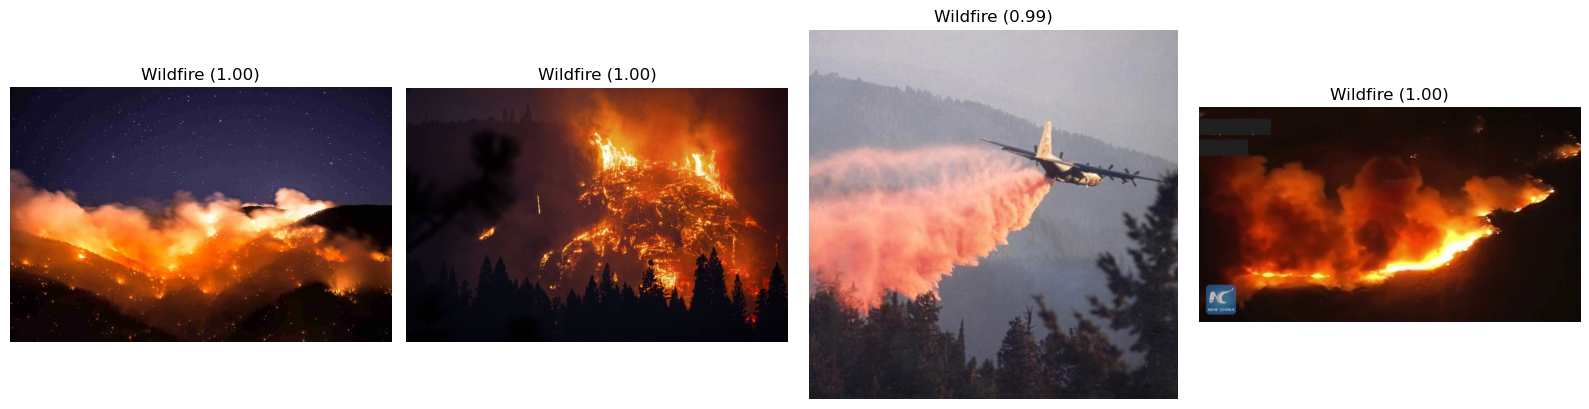

In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


print("Wildfire")

# List of image paths (Updated to "wildfire" category)
image_paths = [
    "dataset/test/wildfire/923.jpg",
    "dataset/test/wildfire/931.jpg",
    "dataset/test/wildfire/968.jpg",
    "dataset/test/wildfire/978.jpg"
]

# Class labels (manual mapping if `train_data.class_indices` is unavailable)
class_labels = {0: "Cyclone", 1: "Earthquake", 2: "Flood", 3: "Wildfire"}

# Create subplots for 4 images
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)

    if img is None:
        print(f"Error: Image not found at {img_path}")
        continue

    # Preprocess Image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img, (128, 128))   # Resize
    img_normalized = img_resized / 255.0        # Normalize

    # Add batch dimension & ensure dtype is float32
    img_input = np.expand_dims(img_normalized, axis=0).astype(np.float32)

    # ✅ Print shape for debugging
    print(f"Image {i+1} input shape: {img_input.shape}")  # Should be (1, 128, 128, 3)

    # 🛠 Debug: Check if shape is correct
    if img_input.shape != (1, 128, 128, 3):
        print(f"Error: Expected shape (1, 128, 128, 3), but got {img_input.shape}")
        continue

    # Predict
    try:
        pred = model.predict(img_input)
        pred_class = np.argmax(pred)  # Get class index
        pred_confidence = np.max(pred)  # Get confidence score
        predicted_label = class_labels.get(pred_class, "Unknown")  # Get class name

        # Display Image with Prediction
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(f"{predicted_label} ({pred_confidence:.2f})")

        # Print Prediction
        print(f"Image {i+1}: Predicted as '{predicted_label}' with confidence {pred_confidence:.2f}")

    except Exception as e:
        print(f"Error during prediction for {img_path}: {e}")

plt.tight_layout()
plt.show()
